## Lesson preamble

### Lecture objectives

- Learn about tidy data.
- Transform data from the long to wide format.
- Understand which types of figures are suitable to create from raw data.
- Learn how to avoid common pitfalls when plotting large data sets.

### Lecture outline

- Reshaping with data with `pivot()`, `pivot_table()`, and `melt()` (40 min)
- Visualization tips and tricks
    - Changing plot appearance with `matplotlib` (35 min)
    - Avoiding saturated plots (40 min)
    - Choose informative plots for categorical data (35 min)
    - Making plots accessible through suitable color choices (10 min)

# Visualization tips and tricks

In [2]:
# Setup by loading the data set from the previous lecture
import pandas as pd

# If you don't have the dataset 
#surveys = pd.read_csv('https://ndownloader.figshare.com/files/2292169')

# If you have already downloaded the dataset
survey = pd.read_csv('../data/world-data-gapminder.csv')

survey.head()

,country,year,population,region,sub-region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_emissions
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN


## Choosing informative plots for categorical data

When visualizing data it is important to explore different plotting options and reflect on which one best conveys the information within the data. In the following code cells, a sample data set is loaded from the `seaborn` data library in order to illustrate some advantages and disadvantages between categorical plot types. This is the same data as was used in lecture 1 and contains three different species of iris flowers and measurements of their sepals and petals.

In [44]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Bar plots

A common visualization when comparing a groups is to create a barplot of the means of each group and plot them next to each other.

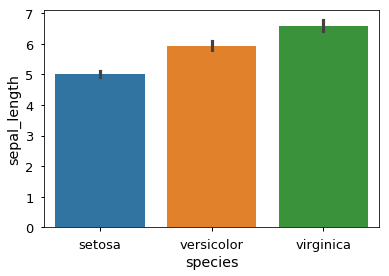

In [45]:
sns.barplot(x='species', y='sepal_length', data=iris)

This barplot shows the mean and the 95% confidence interval. Individual plotting functions in `seaborn` return an axes with the plotted elements. This returned axes object can be assigned to a variable name and customized just as previously in this lecture.

Text(0.5,0,'')

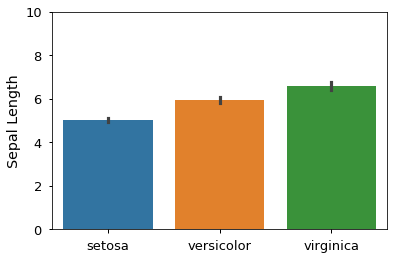

In [46]:
ax = sns.barplot(x='species', y='sepal_length', data=iris)

ax.set_ylim(0, 10)
ax.set_ylabel('Sepal Length')
ax.set_xlabel('')

Since the `seaborn` plotting functions returns a `matplotlib` axes object, these can be used with any `matplotlib` functions. For example, by creating a figure using `subplots()`, the `seaborn` plotting functions can be arranged as subplots in a grid. The syntax is slightly different from doing this with functions that are native to `matplotlib`, and the axes in which the `seaborn` function will plot needs to be specified with the `ax` parameter.

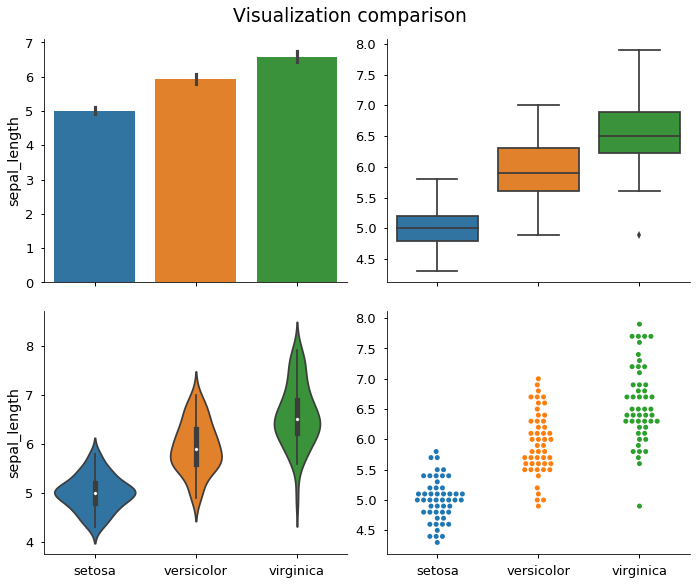

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
fig.suptitle('Visualization comparison', y=1.02) # `y` is used to place the title a little bit higher up
sns.despine()

sns.barplot(x='species', y='sepal_length', data=iris, ax=ax1)
sns.boxplot(x='species', y='sepal_length', data=iris, ax=ax2)
sns.violinplot(x='species', y='sepal_length', data=iris, ax=ax3)
sns.swarmplot(x='species', y='sepal_length', data=iris, ax=ax4)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax4.set_ylabel('')

fig.tight_layout()

>#### Challenge 3
>
>1. How many data points and/or distribution statistics are displayed in each of these plots 
>2. Out of the these plots, which one do you think is the most informative and why? Which is the most true to the underlying data?

### Pros and cons of different graph types

We will deepen the discussion around some of these ideas, in the context of the following plot:

![*Reproduced with permission from [Dr. Koyama's poster](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf)*](./img/dynamite-bars.png)

*Reproduced with permission from [Dr. Koyama's poster](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf)*

It is generally advisable to avoid "decorative" plot elements that do not convey extra information about the data, *especially* when such elements hide the real data. An early champion of this idea was Edward Tufte, who details how to reduce so called non-data ink and many other things in his book [The visual display of quantitative information](https://www.edwardtufte.com/tufte/books_vdqi). In the bar chart above, the only relevant information is given by the where the rectangles of the bars ends on the y-axis, the rest of it is unnecessary. Instead of using the rectangle's height, a simpler marker (circle, square, etc) could have been used to indicate the height on the y-axis. Note that the body of the rectangle is not representative for where the data lies, there are probably no data points close to 0, and several above the rectangle.

Barplots are especially misleading when used as data summaries, as in the
example above. In a summary plot, only two distribution parameters (a measure of
central tendency, e.g. the mean, and error, e.g. the standard deviation or a
confidence interval) are displayed, instead of showing all the individual data
points. This can be highly misleading, since different underlying distributions
can give rise to the same summary plot. We also have no idea of how many observations there are in each group. These
shortcomings become evident when comparing the barplot to the underlying
distributions that were used to create them:

![*Reproduced with permission from [Dr. Koyama's poster*](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf)](./img/dynamite-vs-dists.png)

*Reproduced with permission from [Dr. Koyama's poster](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf)*

Immediately, you can see that conclusions drawn from the barplot, such that A
and B have the same outcome, are factually incorrect. The distribution in D is
bimodal, so representing that with a mean would be like observing black and
white birds and conclude that the average bird color is grey, it's nonsensical.
If we would have planned our follow up experiments based on the barplot alone,
we would have been setting ourselves up for failure! Always be sceptical when
you see a barplot in a published paper, and think of how the underlying
distribution might look (note that barplots are more acceptable when used to
represents counts, proportion or percentages, where there is only one data point
per group in the data set).

Boxplots and violin plots are more meaningful data summaries as they represent more than just two distribution parameters (such as mean +/- sd). However, these can still be misleading and it is often the most appropriate to show each individual observation with a dot/hive/swarm plot, possibly combined with a superimposed summary plot or a marker for the mean or median *if* this additional information is useful. One exception, when it is not advisable to show all data points, is when the data set is gigantic and plotting each individual observation would oversaturate the chart. In that case, plot summary statistics or a 2D histogram (more on this later).

Here is an example of how a violinplot can be combined together with the individual observations in `seaborn`.

Text(0.5,0,'')

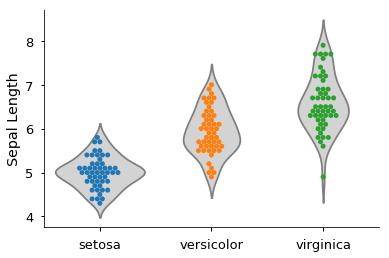

In [48]:
fig, ax = plt.subplots()
sns.despine()

sns.violinplot(x='species', y='sepal_length', data=iris,
               color='lightgrey', inner=None, ax=ax)
sns.swarmplot(x='species', y='sepal_length', data=iris,
              ax=ax) 
ax.set_ylabel('Sepal Length')
ax.set_xlabel('')

Plotting elements have a default order in which they appear. This can be changed by explicitly via the `zorder` parameter.

Text(0.5,0,'')

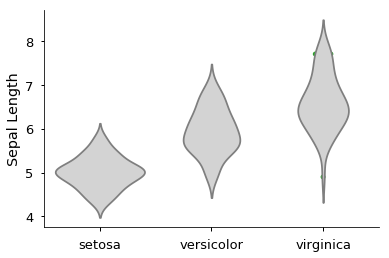

In [49]:
fig, ax = plt.subplots()
sns.despine()

sns.violinplot(x='species', y='sepal_length', data=iris,
               color='lightgrey', inner=None, ax=ax, zorder=10)
sns.swarmplot(x='species', y='sepal_length', data=iris,
              ax=ax, zorder=0) 
ax.set_ylabel('Sepal Length')
ax.set_xlabel('')

>#### Challenge 4
>
>1. So far, we've looked at the distribution of sepal length within species.  Try making a new plot to explore the distribution of another variable within each species.
>2. Combine a `stripplot()` with a `boxplot()`. Set the `jitter` parameter to distribute the dots so that they are not all on one line.

## Making plots accessible through suitable color choices

Colour blindness is common in the population, and red-green colour blindness in particular affects 8% of men and 0.5% of women. Guidelines for making your visualizations more accessible to people affected by colour blindness, will in many cases also improve the interpretability of your graphs for people who have standard color vision. Here are a couple of examples:

Don't use jet rainbow-coloured heatmaps. Jet colourmaps are often the default heatmap used in many visualization packages (you've probably seen them before). 

![](./img/heatmap.png)

Colour blind viewers are going to have a difficult time distinguishing the meaning of this heat map if some of the colours blend together.

![](./img/colourblind.png)

The jet colormap should be avoided for other reasons, including that the sharp transitions between colors introduces visual threshold levels that do not represent the underlying continuous data. Another issue is luminance, or brightness. For example, your eye is drawn to the yellow and cyan regions, because the luminance is higher. This can have the unfortunate effect of highlighting features in your data that don't actually exist, misleading your viewers! It also means that your graph is not going to translate well to greyscale in publication format.

More details about jet can be found in [this blog post](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/) and [this series of posts](https://mycarta.wordpress.com/2012/05/12/the-rainbow-is-dead-long-live-the-rainbow-part-1/). In general, when presenting continuous data, a perceptually uniform colormap is often the most suitable choice. This type of colormap ensures that equal steps in data are perceived as equal steps in color space. The human brain perceives changes in lightness as changes in the data much better than, for example, changes in hue. Therefore, colormaps which have monotonically increasing lightness through the colormap will be better interpreted by the viewer. More details and examples of such colormaps are available in the [`matplotlib` documentation](http://matplotlib.org/users/colormaps.html), and many of the core design principles are outlined in [this entertaining talk](https://www.youtube.com/watch?v=xAoljeRJ3lU).

The default colormap in `matplotlib` is `viridis` which to have monotonically increasing lightness throughout. There is also `cividis`, which is designed to look the same for common colorblindess as for people without colorblindness. Heatmaps is a good example on where color matters

In a correlation matrix, the diagonal is a column's correlaiton with itself, so it is always perfect (1). The same values are mirrored above and below the diagonal.

Another approach to improve visualization clarity is to use different symbols for the groups and to change the color palette to one specifically designed to work well for common colorblindness.

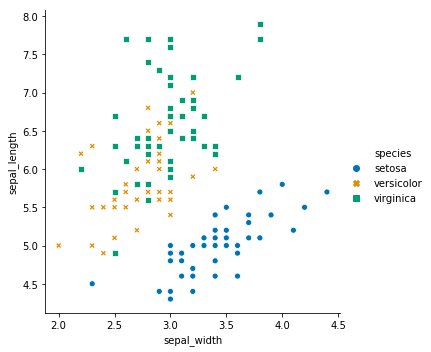

In [8]:
# To see all available palettes, set it to an empty string and view the error message
sns.relplot(x='sepal_width', y='sepal_length', hue='species', data=iris,
           style='species', palette='colorblind')

>#### Challenge 5 (optional)
>
>1. Take one of the figures created previously and upload it to [this website](http://www.color-blindness.com/coblis-color-blindness-simulator/) to see how it  looks in the color blindness simulator.

## Avoiding saturated plots

Summary plots (especially bar plots) were previously mentioned to potentially be misleading, and it is often most appropriate to show every individual observation with a dot plot or the like, perhaps combined with summary markers where appropriate. But, what if the data set is too big to visualize every single observations? In large data sets, it is often the case that plotting each individual observation would oversaturate the chart.  

When plotting a data frame, `matplotlib` plotting functions can be made aware of the structure of the data by specifying the `data` parameter and the `x` and `y` parameters can then be specified just by passing the name of a column in the data frame as a string.

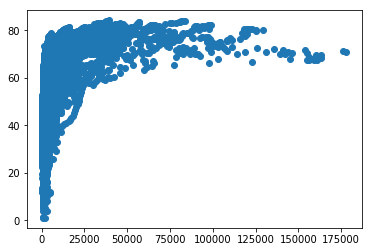

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter('income', 'life_expectancy', data=survey)

Because this is a dataset with 33,288 observations, visualizing it in two dimensions creates a graph that is incredibly oversaturated. Oversaturated graphs make it *far more* difficult to glean information from the visualization. Maybe adjusting the size of each observation could help?

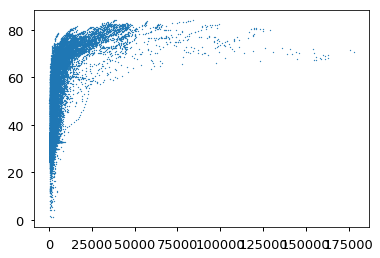

In [121]:
fig, ax = plt.subplots()
ax.scatter('income', 'life_expectancy', data=survey, s=1)

That's a bit better. Reducing the transparency might help further.

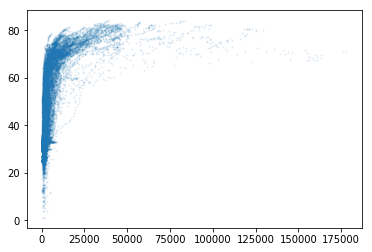

In [118]:
fig, ax = plt.subplots()
ax.scatter('income', 'life_expectancy', data=survey, s=1, alpha=0.1)

This is clearer than initially, but does still not reveal the full structure of the underlying data. Before proceeding, add axis labels and remove the axis lines (spines) on the top and the right.

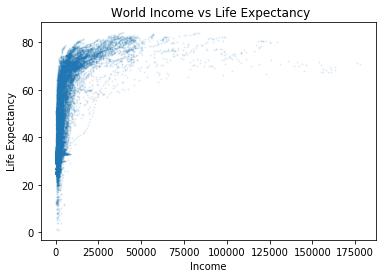

In [119]:
fig, ax = plt.subplots()
ax.scatter('income', 'life_expectancy', data=survey, s=1, alpha=0.1)

ax.set_title(' World Income vs Life Expectancy')
ax.set_xlabel('Income')
ax.set_ylabel('Life Expectancy')

The fontsizes of the labels and title are a bit small. They could be resizes separately, but the easiest way to change all of them is with the previously used `set_context()` function from `seaborn`. Here, `despine()` is also used to improve the visual appeal of the plot by removing the top and right axis spines.

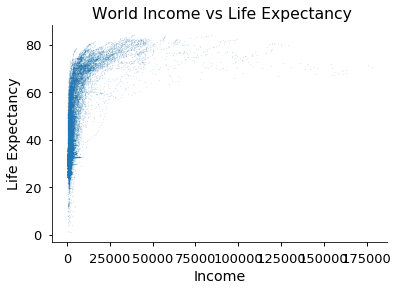

In [120]:
import seaborn as sns

sns.set_context('notebook', font_scale=1.3) # Increase all font sizes

fig, ax = plt.subplots()
ax.scatter('income', 'life_expectancy', data=survey, s=1, alpha=0.1)
sns.despine()

ax.set_title(' World Income vs Life Expectancy')
ax.set_xlabel('Income')
ax.set_ylabel('Life Expectancy')
# sns.despine() essentially does the following:
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

The x- and y-axis limits can be adjusted to zoom in on the denser areas of the plot.

(60, 85)

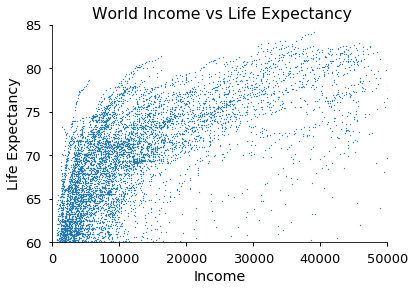

In [125]:
fig, ax = plt.subplots()
ax.scatter('income', 'life_expectancy', data=survey, s=1)
sns.despine()

ax.set_title(' World Income vs Life Expectancy')
ax.set_xlabel('Income')
ax.set_ylabel('Life Expectancy')
ax.set_xlim(0, 50000)
ax.set_ylim(60, 85)

The result is still not satisfactory, which illustrates that a scatter plot is simply not a good choice with huge data sets. A more suitable plot type for this data, is a so called `hexbin` plot, which essentially is a two dimensional histogram, where the color of each hexagonal bin represents the amount of observations in that bin (analogous to the height in a one dimensional histogram). 

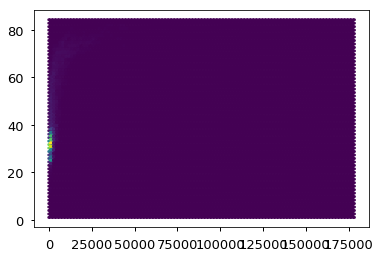

In [126]:
fig, ax = plt.subplots()
ax.hexbin('income', 'life_expectancy', data=survey)

This looks ugly because the bins with zero observations are still colored. This can be avoided by setting the minimum count of observations to color a bin.

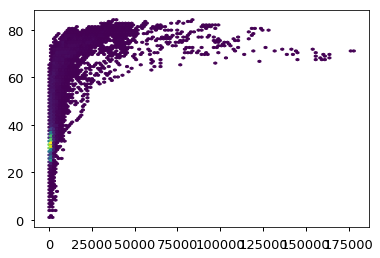

In [127]:
fig, ax = plt.subplots()
ax.hexbin('income', 'life_expectancy', data=survey, mincnt=1)

**Note: the dataset is a timeseries (data collected over years), I don't think scatterplot or this hexbin is a correct way of plotting it. if I choose one year then we only have 152 entries**

The distribution of the data is not more akin to that of the scatter plot. To know what the different colors represent, a colorbar needs to be added to this plot. The space for the colorbar will be taken from a plot in the current figure.

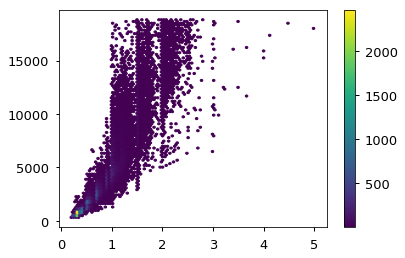

In [38]:
fig, ax = plt.subplots()
# Assign to a variable to reuse with the colorbar
hex_plot = ax.hexbin('carat', 'price', data=diamonds, mincnt=1)
# Create the colorbar from the hexbin plot axis
cax = fig.colorbar(hex_plot)

Notice that the overall figure is the same size, and the axes that contains the hexbin plot shrank to make room for the colorbar. To remind ourselves what is plotted, axis labels can be added like previously.

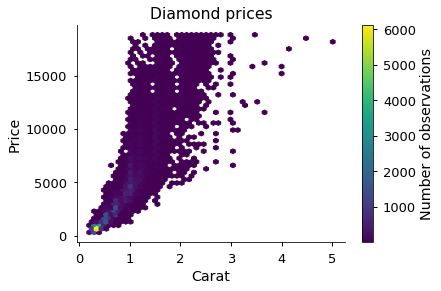

In [39]:
fig, ax = plt.subplots()
hex_plot = ax.hexbin('carat', 'price', data=diamonds, mincnt=1, gridsize=50)
sns.despine()
cax = fig.colorbar(hex_plot)

ax.set_title('Diamond prices')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
cax.set_label('Number of observations')

It is now clear that the yellow area represents over 2000 observations!

Text(0,0.5,'Price')

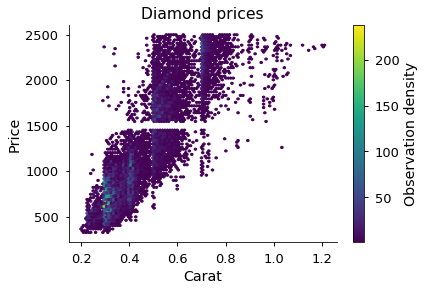

In [40]:
diamonds_subset = diamonds.loc[(diamonds['carat'] < 1.3) & (diamonds['price'] < 2500)]

fig, ax = plt.subplots()
hexbin = ax.hexbin('carat', 'price', data=diamonds_subset, mincnt=1)
sns.despine()
cax = fig.colorbar(hexbin)

cax.set_label('Observation density')
ax.set_title('Diamond prices')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')

Although this hexbin plot is a great way of visualizing the distributions, it could be valuable to compare it to the histograms for each the plotted variable.

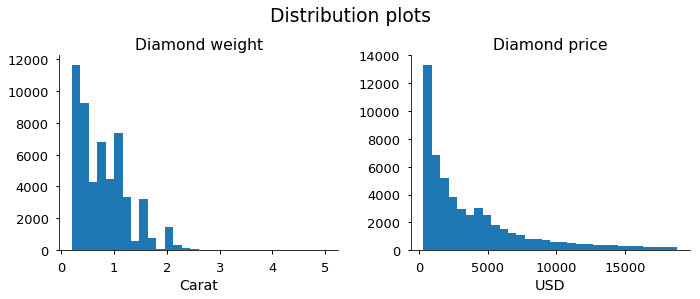

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Distribution plots', y=1.05)
sns.despine()

ax1.hist('carat', bins=30, data=diamonds) 
ax1.set_title('Diamond weight')
ax1.set_xlabel('Carat')

ax2.hist('price', bins=30, data=diamonds) 
ax2.set_title('Diamond price')
ax2.set_xlabel('USD')

fig.tight_layout()

Since visualizing two individual 1D distribution together with their joint 2D distribution is a common operation, `seaborn` has a built-in function to create a hexbin plot with histograms on the marginal axes.

/home/joel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


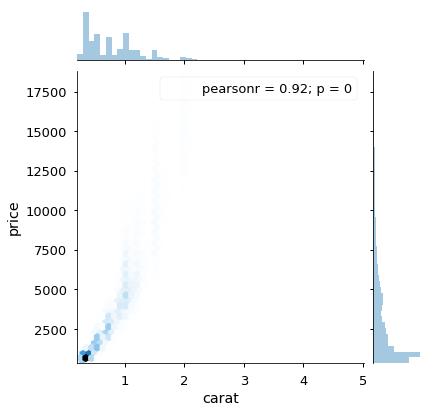

In [42]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='hex')

This can be customized to appear more like the previous hexbin plots. Since `joinplot()` deals with both the hexbin and the histogram, the parameter names must be separated so that it is clear which plot they are referring to. This is done by passing them as dictionaries to the `joint_kws` and `marginal_kws` parameters ("kws" stands for "keywords").

/home/joel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


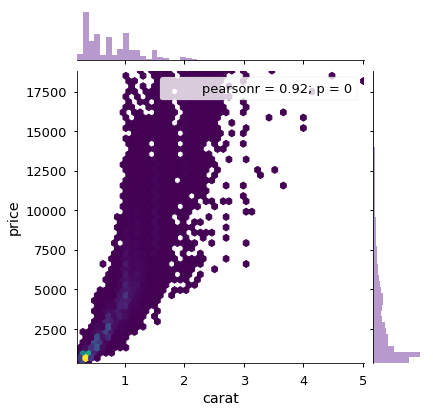

In [43]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='hex', 
              joint_kws={'cmap':'viridis', 'mincnt':1},
              marginal_kws={'color': 'indigo'})

<!-- TODO I should talk about this during the data organization chapter also, maybe I can go into details, and this can be more like repetition? I shold mentioned splittign varibles. and to minimize storage space. -->

**TODO this will stay largely the same but with the seaborn plot in the end to show some plotting utility from melting.**

## Reshaping data between long and wide formats

Data is often presented in a so-called wide format, e.g. with one column per measurement:

|person|weight|height|age|
|------|------|------|---|
|A|70|170|32|
|B|85|179|28|

This can be a great way to display data so that it is easily interpretable by humans and is often used for summary statistics (commonly referred to as pivot tables). However, many data analysis functions in `pandas`, `seaborn` and other packages are optimized to work with the tidy data format. Tidy data is a long format where each row is a single observation and each column contains a single variable:

|person|measure|value|
|------|-----------|-----|
|     A|     weight|   70|
|     A|     height|  170|
|     A|        age|   32|
|     B|     weight|   85|
|     B|     height|  179|
|     B|        age|   28|

`pandas` enables a wide range of manipulations of the structure of data, including alternating between the long and wide format. The survey data presented here is in a tidy format. To facilitate visual comparisons of the relationships between measurements across columns, it would be beneficial to display this data in the wide format. For example, what is the relationship between mean weights of different species caught at the same plot type?

### Subset data

To facilitate the visualization of the the transformations between wide and tidy data,  it is beneficial to create a subset of the data.

In [58]:
survey_sub = survey.loc[survey['year'].isin(['2014'])]
survey_sub.head()

,country,year,population,region,sub-region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_emissions
214,Afghanistan,2014,32800000,Asia,Southern Asia,Low,57.8,1780,4.98,76.1,50.2,0.299
433,Albania,2014,2920000,Europe,Southern Europe,Upper middle,77.4,10700,1.71,14.4,107.0,1.960
652,Algeria,2014,39100000,Africa,Northern Africa,Upper middle,77.1,13500,2.89,25.6,16.4,3.720
871,Angola,2014,26900000,Africa,Sub-Saharan Africa,Lower middle,63.3,6260,5.84,91.2,21.6,1.290
1090,Antigua and Barbuda,2014,98900,Americas,Latin America and the Caribbean,High,77.1,19500,2.08,9.0,225.0,5.380


In [59]:
survey_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 214 to 33283
Data columns (total 12 columns):
country               152 non-null object
year                  152 non-null int64
population            152 non-null int64
region                152 non-null object
sub-region            152 non-null object
income_group          152 non-null object
life_expectancy       152 non-null float64
income                152 non-null int64
children_per_woman    152 non-null float64
child_mortality       152 non-null float64
pop_density           152 non-null float64
co2_emissions         152 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 15.4+ KB


Let's look at the average Co2 emissions across reions and income_group

In [60]:
survey_sub_co2mean = (
    survey_sub
        .groupby(['region','income_group'])['co2_emissions']
        .mean()
        .reset_index()
)
survey_sub_co2mean

,region,income_group,co2_emissions
0,Africa,High,5.310000
1,Africa,Low,0.209038
2,Africa,Lower middle,0.886000
3,Africa,Upper middle,4.696250
4,Americas,High,9.103750
5,Americas,Low,0.271000
6,Americas,Lower middle,0.963000
7,Americas,Upper middle,2.285333
8,Asia,High,18.536000
9,Asia,Low,0.401000


### Long to wide with `pivot()` and `pivot_table()`

The data we created is a long or tidy format. A long to wide transformation would be suitable to effectively visualize the relationship between the average co2 emission of the countries based on their region and income. 

To remove the repeating information for `region` and `income_group`, this table can be pivoted into a wide formatted using the `pivot()` method. The arguments passed to `pivot()` includes the rows (the index), the columns, and which values should populate the table. 

In [30]:
survey_sub_pvt = survey_sub_co2mean.pivot(index='region', columns='income_group', 
                                          values='co2_emissions')
survey_sub_pvt

income_group,High,Low,Lower middle,Upper middle
region,,,,
Africa,3.103712,0.188474,0.497245,3.139034
Americas,4.553769,0.127389,0.555195,1.382742
Asia,14.422279,0.373328,0.898100,2.662135
Europe,4.300285,NaN,3.894556,2.749237
Oceania,5.750193,NaN,0.419491,0.686789


Compare how this table is displayed with the table in the previous cell. It is certainly easier to spot differences between the species and plot types in this wide format.

Since presenting summary statistics in a wide format is such a common operation, `pandas` has a dedicated method, `pivot_table()`, that performs both the data aggregation and pivoting.

In [32]:
survey_sub.pivot_table(index='region', columns='income_group', values='co2_emissions', margins=True)

income_group,High,Low,Lower middle,Upper middle,All
region,,,,,
Africa,5.31000,0.209038,0.886000,4.696250,1.300642
Americas,9.10375,0.271000,0.963000,2.285333,4.084074
Asia,18.53600,0.401000,1.709154,6.038333,7.401105
Europe,6.90360,NaN,5.060000,4.572857,6.353333
Oceania,11.49500,NaN,0.581000,1.163333,3.200444
All,9.98000,0.231818,1.306788,3.995778,4.529637


With `pivot_table()` it is also possible to change the aggregation function.

In [10]:
survey_sub.pivot_table(index='region', columns='income_group', 
                                        values='co2_emissions', margins=True, aggfunc='median')

income_group,High,Low,Lower middle,Upper middle,All
region,,,,,
Africa,5.310,0.1410,0.6065,3.540,0.315
Americas,4.720,0.2710,1.0000,2.280,2.280
Asia,17.450,0.2990,1.0600,4.555,4.120
Europe,5.980,NaN,5.0600,4.240,5.870
Oceania,11.495,NaN,0.5795,1.140,1.030
All,6.495,0.1595,0.8150,3.270,2.610


Although `pivot_table()` is the most convenient way to aggregate *and* pivot data, `pivot()` is still useful to reshape a data frame from wide to long *without* performing aggregation.

The columns and rows can be swapped in the call to `pivot_table()`. This is useful both to present the table differently and to perform computations on a different axis (dimension) of the data frame (this result can also be obtained by calling the `transpose()` method of `subveys_sub`).

In [16]:
survey_sub.pivot_table(index='income_group', columns='region', 
                                        values='co2_emissions')

region,Africa,Americas,Asia,Europe,Oceania
income_group,,,,,
High,5.310000,9.103750,18.536000,6.903600,11.495000
Low,0.209038,0.271000,0.401000,NaN,NaN
Lower middle,0.886000,0.963000,1.709154,5.060000,0.581000
Upper middle,4.696250,2.285333,6.038333,4.572857,1.163333


### Wide to long with `melt()`

It is also a common operation to reshape data from the wide to the long format, e.g. when getting the data into the most suitable format for analysis. For this transformation, the `melt()` method can be used to sweep up a set of columns into one key-value pair.

To prepare the data frame, the `plot_type` index name can be moved to a column name with the `reset_index()` method.

In [17]:
survey_sub_pvt

income_group,High,Low,Lower middle,Upper middle
region,,,,
Africa,5.31000,0.209038,0.886000,4.696250
Americas,9.10375,0.271000,0.963000,2.285333
Asia,18.53600,0.401000,1.709154,6.038333
Europe,6.90360,NaN,5.060000,4.572857
Oceania,11.49500,NaN,0.581000,1.163333


In [18]:
survey_sub_pvt = survey_sub_pvt.reset_index()
survey_sub_pvt

income_group,region,High,Low,Lower middle,Upper middle
0,Africa,5.31000,0.209038,0.886000,4.696250
1,Americas,9.10375,0.271000,0.963000,2.285333
2,Asia,18.53600,0.401000,1.709154,6.038333
3,Europe,6.90360,NaN,5.060000,4.572857
4,Oceania,11.49500,NaN,0.581000,1.163333


At a minimum, `melt()` only requires the name of the column that should be kept intact. All remaining columns will have their values in the `value` column and their name in the `variable` column (here, our columns already has a name "income_group", so this will be used automatically instead of "variable").

In [19]:
survey_sub_pvt.melt(id_vars='region')

,region,income_group,value
0,Africa,High,5.310000
1,Americas,High,9.103750
2,Asia,High,18.536000
3,Europe,High,6.903600
4,Oceania,High,11.495000
5,Africa,Low,0.209038
6,Americas,Low,0.271000
7,Asia,Low,0.401000
8,Europe,Low,NaN
9,Oceania,Low,NaN


To be more explicit, all the arguments to `melt()` can be specified. This way it is also possible to exclude some columns, e.g. the income group 'Lower middle'.

In [36]:
survey_sub_pvt.melt(id_vars='region', value_vars=['High','Low','Lower middle','Upper middle'], 
                     var_name='income_group', value_name='co2_emissions')

,region,income_group,co2_emissions
0,Africa,High,5.310000
1,Americas,High,9.103750
2,Asia,High,18.536000
3,Europe,High,6.903600
4,Oceania,High,11.495000
5,Africa,Low,0.209038
6,Americas,Low,0.271000
7,Asia,Low,0.401000
8,Europe,Low,NaN
9,Oceania,Low,NaN


>#### Challenge 1
>
> Let's choose the 'pop_density' and 'co2_emissions' of the countries in 'Southern Europe' at '1950'  and melt it into a tidy data format. 

In [106]:
#answer:
# take the year and subregion of interest
survey_sub = survey.loc[survey['year'].isin(['1950']) & survey['sub-region'].isin(['Southern Europe'])].reset_index()
survey_sub = survey_sub[['country','pop_density','co2_emissions']]
#survey_sub

#make it to a tidy data type 
survey_sub_tidy = survey_sub.melt(id_vars='country')
#survey_sub_tidy

# if we wanted to drop the NaN values in the previous format we had to index a 2D dataframe
# but in a tidy data format it's easier to drop the NaN values:
survey_sub_tidy.dropna()

,country,variable,value
0,Albania,pop_density,46.100
1,Bosnia and Herzegovina,pop_density,52.200
2,Croatia,pop_density,68.800
3,Greece,pop_density,59.500
4,Italy,pop_density,158.000
5,Malta,pop_density,975.000
6,Montenegro,pop_density,29.300
7,Portugal,pop_density,91.900
8,Serbia,pop_density,77.000
9,Slovenia,pop_density,73.100


### More general resources on plotting

- [Ten Simple Rules for Better Figures](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
- [Finding the Right Color Palettes for Data Visualizations](https://blog.graphiq.com/finding-the-right-color-palettes-for-data-visualizations-fcd4e707a283)
- [Examples of bad graphs](https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/)
- [More examples of bad graphs and how to improve them](https://www.stat.auckland.ac.nz/~ihaka/120/Lectures/lecture03.pdf)
- [Wikipedia has a great article on misleading graphs](https://en.wikipedia.org/wiki/Misleading_graph)
- [Usability article about how to design for people with color blindness](http://blog.usabilla.com/how-to-design-for-color-blindness/)